# Obraz - transfer learning - praca domowa
Ostatnia aktualizacja: 2022.12.10

Z dokumentacji [Keras](https://keras.io/guides/transfer_learning/): *Transfer learning consists of taking features learned on one problem, and leveraging them on a new, similar problem.*

Głównym celem pracy domowej jest stworzenie klasyfikatora, który będzie odróżniał zdjęcia obiektów w wybranym przez nas zbiorze. Użyjemy do tego jednego z [gotowych modeli Keras](https://keras.io/api/applications/), wytrenowanego wcześniej na zbiorze Imagenet. 

Przydatne źródła:
- [transfer learning vgg16 + tf_flowers](https://towardsdatascience.com/transfer-learning-with-vgg16-and-keras-50ea161580b4)
- [Keras - transfer learning](https://keras.io/guides/transfer_learning/)

### Wybierz swój zbiór danych### 
Chcemy mieć co najmniej 2-3 klasy. Możesz użyć gotowego zbioru (np. z [katalogu tensorflow](https://www.tensorflow.org/datasets/catalog/overview) lub [kaggle](https://www.kaggle.com/datasets)) albo użyć własnych danych. 
- [Przykładowy zbiór: tf_flowers](https://www.tensorflow.org/datasets/catalog/tf_flowers). 
- [Przykładowy zbiór: plant_leaves](https://www.tensorflow.org/datasets/catalog/plant_leaves). 

Wczytaj i przygotuj dane do treningu. 



In [35]:
import pandas as pd

In [36]:
import tensorflow as tf
from tensorflow.python.client import device_lib

print("GPUs Available: ", (tf.test.is_gpu_available()))
device_lib.list_local_devices()

GPUs Available:  True


[name: "/device:CPU:0"
 device_type: "CPU"
 memory_limit: 268435456
 locality {
 }
 incarnation: 1028725628815967846
 xla_global_id: -1,
 name: "/device:GPU:0"
 device_type: "GPU"
 memory_limit: 5654970368
 locality {
   bus_id: 1
   links {
   }
 }
 incarnation: 6014169320991213183
 physical_device_desc: "device: 0, name: NVIDIA GeForce RTX 3080 Laptop GPU, pci bus id: 0000:01:00.0, compute capability: 8.6"
 xla_global_id: 416903419]

In [37]:
df = pd.read_csv('app/ChestX-ray8.csv', sep = ',')
df.head()

,Image Index,Finding Labels,Follow-up #,Patient ID,Patient Age,Patient Gender,View Position,OriginalImage[Width,Height],OriginalImagePixelSpacing[x,y]
0,00000001_000.png,Cardiomegaly,0,1,57,M,PA,2682,2749,0.143,0.143
1,00000001_001.png,Cardiomegaly|Emphysema,1,1,58,M,PA,2894,2729,0.143,0.143
2,00000001_002.png,Cardiomegaly|Effusion,2,1,58,M,PA,2500,2048,0.168,0.168
3,00000002_000.png,No Finding,0,2,80,M,PA,2500,2048,0.171,0.171
4,00000003_001.png,Hernia,0,3,74,F,PA,2500,2048,0.168,0.168


In [38]:
# URLs for the zip files
import urllib.request

# links = [
          # 'https://nihcc.box.com/shared/static/vfk49d74nhbxq3nqjg0900w5nvkorp5c.gz',
          # 'https://nihcc.box.com/shared/static/i28rlmbvmfjbl8p2n3ril0pptcmcu9d1.gz',
          # 'https://nihcc.box.com/shared/static/f1t00wrtdk94satdfb9olcolqx20z2jp.gz',
          # 'https://nihcc.box.com/shared/static/0aowwzs5lhjrceb3qp67ahp0rd1l1etg.gz',
          # 'https://nihcc.box.com/shared/static/v5e3goj22zr6h8tzualxfsqlqaygfbsn.gz',
          # 'https://nihcc.box.com/shared/static/asi7ikud9jwnkrnkj99jnpfkjdes7l6l.gz'
          # 'https://nihcc.box.com/shared/static/jn1b4mw4n6lnh74ovmcjb8y48h8xj07n.gz',
          # 'https://nihcc.box.com/shared/static/tvpxmn7qyrgl0w8wfh9kqfjskv6nmm1j.gz',
          # 'https://nihcc.box.com/shared/static/upyy3ml7qdumlgk2rfcvlb9k6gvqq2pj.gz',
          # 'https://nihcc.box.com/shared/static/l6nilvfa9cg3s28tqv1qc1olm3gnz54p.gz',
          # 'https://nihcc.box.com/shared/static/hhq8fkdgvcari67vfhs7ppg2w6ni4jze.gz',
          # 'https://nihcc.box.com/shared/static/ioqwiy20ihqwyr8pf4c24eazhh281pbu.gz'
# ]

# for idx, link in enumerate(links):
#     fn = 'images_%02d.tar.gz' % (idx+1)
#     print('downloading'+fn+'...')
#     urllib.request.urlretrieve(link, fn)  # download the zip file

# print("Download complete.")

In [39]:
# for i in range(1, (len(links)+1)):
#   !tar -xzvf "images_0{i}.tar.gz" "images"

### Wczytaj wytrenowany model do klasyfikacji obrazu. ###
Może to być jeden z gotowych [modeli dostępnych w Keras](https://keras.io/api/applications/). Wczytujemy go z wytrenowanymi już wcześniej wagami na Imagenecie (weights='imagenet'). 

Model możemy wczytać bez ostatnich warstw (include_top=False) i dodać je potem ręcznie, dostosowane do liczby klas w naszym zbiorze. Imagenet ma 1000 klas, my prawdopodobnie będziemy mieć ich mniej. 

Pamiętaj, żeby wyłączyć lub ograniczyć trening części modelu z wytrenowanymi już wagami (trainable=False). 

In [40]:
import pandas as pd
import numpy as np
import os
import cv2
from  matplotlib import pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

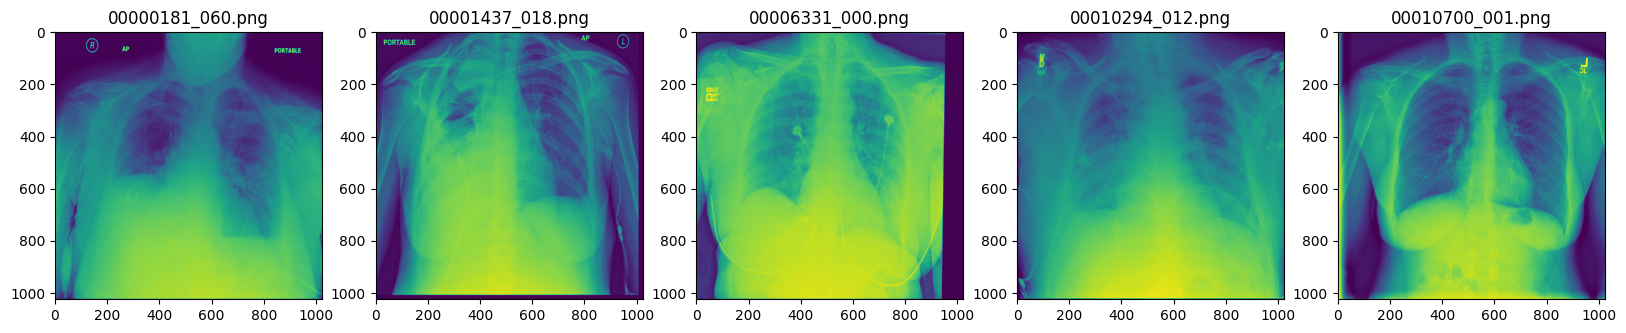

In [41]:
plt.figure(figsize=(20,20))
img_folder=r'images'
for i in range(5):
    file = np.random.choice(os.listdir(img_folder))
    image_path = os.path.join(img_folder, file)
    img=mpimg.imread(image_path)
    ax=plt.subplot(1,5,i+1)
    ax.title.set_text(file)
    plt.imshow(img)

In [42]:
files_set = set(df["Image Index"].unique())
y_files = [str(file) for file in os.listdir(img_folder) if file in files_set]
y_files[:5]

['00000001_000.png',
 '00000001_001.png',
 '00000001_002.png',
 '00000002_000.png',
 '00000003_000.png']

In [43]:
y_files_ = pd.Series(y_files)
df = pd.merge(y_files_.to_frame("filename"), df[["Finding Labels", "Image Index"]], how='inner', left_on = "filename", right_on = "Image Index").drop(columns = "filename")
df = df.rename(columns={"Finding Labels": "label", "Image Index": "file"})

In [44]:
df.label = df.label.apply(lambda x:x.split(sep="|"))
df.label.head()

0               [Cardiomegaly]
1    [Cardiomegaly, Emphysema]
2     [Cardiomegaly, Effusion]
3                 [No Finding]
4                     [Hernia]
Name: label, dtype: object

In [45]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

labels = df.label.values.tolist()
classes = set([item for sublist in labels for item in sublist])
y_ = labels
le.fit(list(classes))

LabelEncoder()

In [46]:
y_[:5]

[['Cardiomegaly'],
 ['Cardiomegaly', 'Emphysema'],
 ['Cardiomegaly', 'Effusion'],
 ['No Finding'],
 ['Hernia']]

In [47]:
y = [le.transform(y_set) for y_set in y_]

In [48]:
from keras.utils.np_utils import to_categorical

y_one_hot = [to_categorical(y_set, num_classes = len(le.classes_)) for y_set in y]
y = np.array([y_set.sum(axis = 0) for y_set in y_one_hot])

In [49]:
y.shape

(54999, 15)

In [50]:
y[:5]

array([[0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.]],
      dtype=float32)

In [51]:
le.classes_

array(['Atelectasis', 'Cardiomegaly', 'Consolidation', 'Edema',
       'Effusion', 'Emphysema', 'Fibrosis', 'Hernia', 'Infiltration',
       'Mass', 'No Finding', 'Nodule', 'Pleural_Thickening', 'Pneumonia',
       'Pneumothorax'], dtype='<U18')

In [52]:
labels[:5]

[['Cardiomegaly'],
 ['Cardiomegaly', 'Emphysema'],
 ['Cardiomegaly', 'Effusion'],
 ['No Finding'],
 ['Hernia']]

In [53]:
# X_train = img_data.astype('float32') / np.max(img_data)
# X_test = X_test.astype('float32') / np.max(X_test)

### Zadanie 3: Trening od zera i porównanie ###
**(Zadanie na ocenę 5, po wykonaniu zadania 1 i 2)**

Spróbuj skonstruować swój własny model i wytrenować go 'od zera' na tych samych danych. Porównaj i omów swój ekeperyment i wyniki (100 słów).

In [54]:
import tensorflow as tf
from tensorflow import keras
from keras.layers.core import Dense, Flatten, Dropout, Activation
from keras.layers import BatchNormalization, LeakyReLU
from keras.models import Sequential, Model
from keras.layers.convolutional import Conv2D, MaxPooling2D

In [55]:
from tensorflow.keras import mixed_precision
import tensorflow.keras.backend as K
policy = mixed_precision.Policy('mixed_float16')
mixed_precision.set_global_policy(policy)
K.set_epsilon(1e-4)

In [56]:
import keras.backend as K

def get_f1(y_true, y_pred): #taken from old keras source code
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    recall = true_positives / (possible_positives + K.epsilon())
    f1_val = 2*(precision*recall)/(precision+recall + K.epsilon())
    return f1_val

In [57]:
list_IDs = os.listdir(img_folder)
list_IDs = np.array(list_IDs)
IMAGE_COUNT = list_IDs.shape[0]
TRAIN_THRESHOLD = int(0.8*IMAGE_COUNT)

list_IDs_train = list_IDs[:TRAIN_THRESHOLD]
list_IDs_test = list_IDs[TRAIN_THRESHOLD:] # use last 20% of images as a test set

Y_train = y[:TRAIN_THRESHOLD]
Y_test = y[TRAIN_THRESHOLD:] 

In [58]:
INPUT_SHAPE = (256, 256, 3)

inputs = keras.Input(shape=INPUT_SHAPE)

x = Conv2D(32, kernel_size = (3, 3), padding = 'same')(inputs)
x = BatchNormalization()(x)
x = Activation("tanh")(x)
x = MaxPooling2D(pool_size = (2,2))(x)
x = Dropout(.2)(x)
# x = Conv2D(32, kernel_size = (3, 3), padding = 'same')(x)
# x = BatchNormalization()(x)
# x = Activation("elu")(x)
# x = MaxPooling2D(pool_size = (2,2))(x)
# x = Dropout(.2)(x)

x = Conv2D(64, kernel_size = (3, 3), padding = 'same')(x)
x = BatchNormalization()(x)
x = Activation("tanh")(x)
x = MaxPooling2D(pool_size = (2,2))(x)
x = Dropout(.2)(x)
# x = Conv2D(64, kernel_size = (3, 3), padding = 'same')(x)
# x = BatchNormalization()(x)
# x = Activation("tanh")(x)
# x = MaxPooling2D(pool_size = (2,2))(x)
# x = Dropout(.2)(x)

x = Conv2D(128, kernel_size = (3, 3), padding = 'same')(x)
x = BatchNormalization()(x)
x = Activation("tanh")(x)
x = MaxPooling2D(pool_size = (2,2))(x)
x = Dropout(.2)(x)
# x = Conv2D(128, kernel_size = (3, 3), padding = 'same')(x)
# x = BatchNormalization()(x)
# x = Activation("tanh")(x)
# x = MaxPooling2D(pool_size = (2,2))(x)
# x = Dropout(.2)(x)

x = Flatten()(x)
x = Dense(256, activation = "tanh")(x)
x = Dropout(.2)(x)

outputs = Dense(Y_train.shape[1], activation = "sigmoid")(x)
model = keras.Model(inputs=inputs, outputs=outputs)

In [59]:
model.compile(loss = "binary_crossentropy", optimizer = tf.keras.optimizers.Adam(), metrics=[tf.keras.metrics.Precision(), tf.keras.metrics.Recall(), get_f1])
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_6 (InputLayer)        [(None, 256, 256, 3)]     0         
                                                                 
 conv2d_3 (Conv2D)           (None, 256, 256, 32)      896       
                                                                 
 batch_normalization_3 (Batc  (None, 256, 256, 32)     128       
 hNormalization)                                                 
                                                                 
 activation_263 (Activation)  (None, 256, 256, 32)     0         
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 128, 128, 32)     0         
 2D)                                                             
                                                                 
 dropout_4 (Dropout)         (None, 128, 128, 32)      0   

In [60]:
from tensorflow.keras.utils import load_img, img_to_array
from keras.utils import Sequence

BATCH_SIZE = 128
EPOCHS = 1

class DataGenerator(Sequence): 
  def __init__(self, list_IDs, labels, batch_size, dim=INPUT_SHAPE[:-1], n_channels=INPUT_SHAPE[-1]):
      '''Initialization'''
      self.dim = dim
      self.batch_size = batch_size
      self.labels = labels
      self.list_IDs = list_IDs
      self.n_channels = n_channels
      self.n_classes = labels.shape[1]
      self.indexes = np.arange(len(self.list_IDs))
    
  def __data_generation(self, list_IDs_temp, image_folder = "images"):
      '''Generates data containing batch_size samples
         Args:
              - list_IDs_temp: (n_samples)
         Returns:
              - X: (n_samples, *dim, n_channels)
              - y: (n_samples, n_classes)
      '''
      X = np.empty((self.batch_size, *self.dim, self.n_channels))
      y = np.empty((self.batch_size, self.n_classes), dtype=int)

      for i, image_name in enumerate(list_IDs_temp):
          img_path = f"{image_folder}/{image_name}"
          img = load_img(img_path, target_size=self.dim)
          X[i] = np.array(img_to_array(img))/255.
          y[i] = np.array(self.labels[i])
      return X, y

  def __len__(self):
      steps_per_epoch = int(np.floor(len(self.list_IDs) / self.batch_size))
      return steps_per_epoch

  def __getitem__(self, index):
      ''' Generate one batch of data'''
      indexes = self.indexes[index*self.batch_size:(index+1)*self.batch_size]
      list_IDs_temp = [self.list_IDs[k] for k in indexes]
      X, y = self.__data_generation(list_IDs_temp)
      return X, y

In [ ]:
IMAGE_COUNT_TRAIN = list_IDs_train.shape[0]

training_indices = np.random.choice(IMAGE_COUNT_TRAIN, int(0.9*IMAGE_COUNT_TRAIN), replace=False)
training_generator = DataGenerator(list_IDs_train[training_indices], Y_train[training_indices], BATCH_SIZE)
validation_generator = DataGenerator(list_IDs_train[~training_indices], Y_train[~training_indices], BATCH_SIZE)

checkpoint_path = "training_chest_xray_cnn_custom/checkpoint.ckpt"
checkpoint_dir = os.path.dirname(checkpoint_path)
early_stopping_callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=3)
cp_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,
                                                 save_weights_only=True,
                                                 verbose=2)
history = model.fit(training_generator, epochs = EPOCHS, validation_data = validation_generator, callbacks = [early_stopping_callback, cp_callback])

# do przetestowania inne funkcje aktywacje - leaky relu etc. i okrojenie etykiet (dropowanie w oparciu o contains() na kolumnie)

 13/309 [>.............................] - ETA: 10:35 - loss: 0.2892 - precision_5: 0.2959 - recall_5: 0.2766 - get_f1: 0.3225

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

Proces trenowania modelu okazał się z wielu względów wyjątkowo wymagający. Poza ustaleniem optymalnej struktury modelu, wyzwaniem było dopasowanie parametrów *batch size* i *input shape* tak, by uniknąć OOM, a jednocześnie utrzymać możliwie najwyższą jakość obrazu (istotną z punktu widzenia złożoności zadania - diagnozy medycznej) i jednocześnie odpowiednio często aktualizować wagi modelu. Model ulegał przetrenowaniu; overfitting był wyraźnie widoczny przy zastosowaniu uproszczonej architektury CNN połączonej z 10k zdjęć składającymi się na zestaw szkoleniowy, który wydawało się być niewystarczające przy tej złożoności zadania - pojedynczy obraz mógł mieć od 1 do nawet 5 etykiet, przy znanych 15 klasach (*vocab size*).

*TODO: omówienie (100 słów)*

In [ ]:
test_generator = DataGenerator(list_IDs_test, Y_test, BATCH_SIZE)
results = model.evaluate(test_generator)
results

### Zadanie 1: Wytrenuj model na swoich danych ###
**(Zadanie na ocenę 3)**

Wytrenuj wybrany model na swoich danych. Omów eksperyment i wyniki (100 słów). 

In [ ]:
from keras.applications.vgg19 import VGG19

pre_trained_model = VGG19(input_shape=INPUT_SHAPE, include_top=False, weights="imagenet")

for layer in pre_trained_model.layers[:19]:
    layer.trainable = False

model_VGG19 = Sequential([
    pre_trained_model,
    MaxPooling2D((2,2) , strides = 2),
    Flatten(),
    Dense(Y_train.shape[1], activation = "sigmoid")
])

model_VGG19.compile(loss = "binary_crossentropy", optimizer = tf.keras.optimizers.Adam(1e-4), metrics=[tf.keras.metrics.Precision(), tf.keras.metrics.Recall(), get_f1])
model.summary()

In [ ]:
model_VGG19.fit(training_generator, epochs = EPOCHS, validation_data = validation_generator, callbacks = [early_stopping_callback, cp_callback], verbose=2)

In [ ]:
test_generator = DataGenerator(list_IDs_test, Y_test, BATCH_SIZE)
results = model_VGG19.evaluate(test_generator)
results

### Zadanie 2: Dodatkowe sieci ###
**(Zadanie na ocenę 4, po wykonaniu  zadania 1)**

Przeprowadź to samo na dwóch dodatkowych sieciach i omów wyniki (100 słów). 

Czyli jeśli w zadaniu 1 użyliśmy np. VGG to teraz wybieramy sobie np. ResNet i MobileNet. 

*TODO: omówienie (100 słów)*

In [ ]:
from keras.applications.resnet import ResNet152

pre_trained_model = ResNet152(input_shape=INPUT_SHAPE, include_top=False, weights="imagenet")

for layer in pre_trained_model.layers[:19]:
    layer.trainable = False

ResNet152 = Sequential([
    pre_trained_model,
    MaxPooling2D((2,2) , strides = 2),
    Flatten(),
    Dense(Y_train.shape[1], activation = "sigmoid")
])

ResNet152.compile(loss = "binary_crossentropy", optimizer = tf.keras.optimizers.Adam(1e-4), metrics=[tf.keras.metrics.Precision(), tf.keras.metrics.Recall(), get_f1])
ResNet152.summary()

In [ ]:
ResNet152.fit(training_generator, epochs = EPOCHS, validation_data = validation_generator, callbacks = [early_stopping_callback, cp_callback], verbose=2)

In [ ]:
test_generator = DataGenerator(list_IDs_test, Y_test, BATCH_SIZE)
results = ResNet152.evaluate(test_generator)
results

In [ ]:
from keras.applications import NASNetLarge

pre_trained_model = NASNetLarge(input_shape=INPUT_SHAPE, include_top=False, weights="imagenet")

for layer in pre_trained_model.layers[:19]:
    layer.trainable = False

NASNetLarge = Sequential([
    pre_trained_model,
    MaxPooling2D((2,2) , strides = 2),
    Flatten(),
    Dense(Y_train.shape[1], activation = "sigmoid")
])

NASNetLarge.compile(loss = "binary_crossentropy", optimizer = tf.keras.optimizers.Adam(1e-4), metrics=[tf.keras.metrics.Precision(), tf.keras.metrics.Recall(), get_f1])
NASNetLarge.summary()

In [ ]:
NASNetLarge.fit(training_generator, epochs = EPOCHS, validation_data = validation_generator, callbacks = [early_stopping_callback, cp_callback], verbose=2)

In [ ]:
test_generator = DataGenerator(list_IDs_test, Y_test, BATCH_SIZE)
results = NASNetLarge.evaluate(test_generator)
results

*TODO: omówienie (100 słów)*

To wszystko, dziękuję. Wypełniony notatnik zapisz jako .ipynb i oddaj w Teams. 